# Optimización de Rutas

En un mundo cada vez más interconectado, la optimización de rutas se ha convertido en un desafío crucial en diversas áreas, desde la logística y el transporte hasta la planificación de viajes y la gestión de redes de comunicación. En este escenario, se enfrenta el desafío de encontrar la ruta más corta entre dos ciudades específicas en un extenso mapa de conexiones. El mapa de conexiones representa una red compleja de ciudades interconectadas, donde cada ciudad está conectada a otras por una serie de rutas. Cada conexión está asociada con una distancia que indica la longitud o costo para viajar de una ciudad a otra. El propósito fundamental es determinar la ruta más corta entre una ciudad de origen y una ciudad de destino. Esta ruta óptima no solo implica la distancia mínima, sino también el camino más eficiente y práctico para el traslado entre las dos ciudades.

Teniendo el siguiente mapa en forma de grafo:


```
grafo = {
'A': {'B': 5, 'C': 8, 'D': 9},
'B': {'A': 5, 'E': 15, 'F': 7},
'C': {'A': 8, 'G': 12, 'H': 10},
'D': {'A': 9, 'I': 11, 'J': 6},
'E': {'B': 15, 'K': 9, 'L': 13},
'F': {'B': 7, 'M': 8, 'N': 6},
'G': {'C': 12, 'O': 10, 'P': 5},
'H': {'C': 10, 'Q': 11, 'R': 7},
'I': {'D': 11, 'S': 14, 'T': 8},
'J': {'D': 6, 'U': 9, 'V': 12},
'K': {'E': 9},
'L': {'E': 13},
'M': {'F': 8},
'N': {'F': 6},
'O': {'G': 10},
'P': {'G': 5},
'Q': {'H': 11},
'R': {'H': 7},
'S': {'I': 14},
'T': {'I': 8},
'U': {'J': 9},
'V': {'J': 12}
}
```

**La lectura del grafo es la siguiente**

Existen 22 ciudades, cada una es una letra en mayúscula.
El valor de las distancias entre ciudades aparece como el valor de las claves del diccionario. Ejemplo: La distancia entre K y E es de 9. La distancia entre A y B es 5.
Se necesita implementar un programa en Python que encuentre la ruta más corta entre dos puntos usando el algoritmo DFS (Búsqueda en profundidad).

**Entrada**
- Cada uno de los casos de prueba estará compuesto por una línea con la ciudad de origen y la ciudad destino.
- Las ciudades se representan con letras mayúsculas. (No colocar minúsculas ya que se genera error).

**Salida**  


- La salida estará representada por una única línea formada por las letras correspondientes a la ruta más corta. Si no hay camino disponible entre los dos puntos imprimir la palabra 'None'


**Casos de prueba**
```
Entrada	Salida Esperada
A Q	    A C H Q
A P	    A C G P
A B	    A B
A Z	    None
```
Instrucciones para la calificación automática

Antes de enviar la solución del quiz, por favor tenga en cuenta los siguientes aspectos:

- Cada caso de prueba se especifica con una línea.
- Cada línea debe contener los valores de los parámetros requeridos separados por un espacio.
- Es importante no utilizar ningún mensaje a la hora de capturar las entradas, es decir, al utilizar la función input()no agregue ningún texto para capturar los datos.
- Los resultados se muestran en una única línea. Los dos valores requeridos deben estar separados por un espacio.



In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

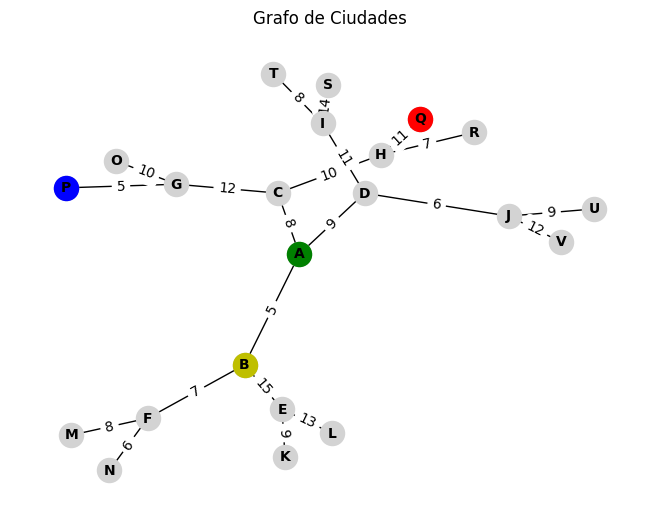

In [10]:
grafo = {
'A': {'B': 5, 'C': 8, 'D': 9},
'B': {'A': 5, 'E': 15, 'F': 7},
'C': {'A': 8, 'G': 12, 'H': 10},
'D': {'A': 9, 'I': 11, 'J': 6},
'E': {'B': 15, 'K': 9, 'L': 13},
'F': {'B': 7, 'M': 8, 'N': 6},
'G': {'C': 12, 'O': 10, 'P': 5},
'H': {'C': 10, 'Q': 11, 'R': 7},
'I': {'D': 11, 'S': 14, 'T': 8},
'J': {'D': 6, 'U': 9, 'V': 12},
'K': {'E': 9},
'L': {'E': 13},
'M': {'F': 8},
'N': {'F': 6},
'O': {'G': 10},
'P': {'G': 5},
'Q': {'H': 11},
'R': {'H': 7},
'S': {'I': 14},
'T': {'I': 8},
'U': {'J': 9},
'V': {'J': 12}
}
G= nx.Graph()

for ciudad, conexiones in grafo.items():
  for vecino, peso in conexiones.items():
    G.add_edge(ciudad, vecino, weight=peso)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=300, font_size=10, font_weight='bold')
etiquetas =nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas)

#inicio
nx.draw_networkx_nodes(G, pos, nodelist=['A'], node_color='g', node_size=300)
#final 1
nx.draw_networkx_nodes(G, pos, nodelist=['Q'], node_color='r', node_size=300)
#final 2
nx.draw_networkx_nodes(G, pos, nodelist=['P'], node_color='b', node_size=300)
#final 3
nx.draw_networkx_nodes(G, pos, nodelist=['B'], node_color='y', node_size=300)

plt.title('Grafo de Ciudades')
plt.show()

In [16]:
grafo = {
'A': {'B': 5, 'C': 8, 'D': 9},
'B': {'A': 5, 'E': 15, 'F': 7},
'C': {'A': 8, 'G': 12, 'H': 10},
'D': {'A': 9, 'I': 11, 'J': 6},
'E': {'B': 15, 'K': 9, 'L': 13},
'F': {'B': 7, 'M': 8, 'N': 6},
'G': {'C': 12, 'O': 10, 'P': 5},
'H': {'C': 10, 'Q': 11, 'R': 7},
'I': {'D': 11, 'S': 14, 'T': 8},
'J': {'D': 6, 'U': 9, 'V': 12},
'K': {'E': 9},
'L': {'E': 13},
'M': {'F': 8},
'N': {'F': 6},
'O': {'G': 10},
'P': {'G': 5},
'Q': {'H': 11},
'R': {'H': 7},
'S': {'I': 14},
'T': {'I': 8},
'U': {'J': 9},
'V': {'J': 12}
}

def DFS(grafo, inicio, final, visitados=None,ruta=None):
  if visitados is None:
    visitados=[]
  if ruta is None:
    ruta=[inicio]
  if inicio == final:
    return ruta
  visitados.append(inicio)
  for ciudad in grafo[inicio]:
    if ciudad not in visitados:
      nueva_ruta =list(ruta)
      nueva_ruta.append(ciudad)
      camino=DFS(grafo, ciudad, final, visitados, nueva_ruta)
      if camino:
        return camino
  return None

inicio, final= input().split(' ')
ruta=DFS(grafo, inicio, final)
if ruta is None:
  print(None)
else:
  print(' '.join(ruta))

A Z
None
